In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


Mean Squared Error: 2.964714911628019
R2 Score: -0.0009652432893494378


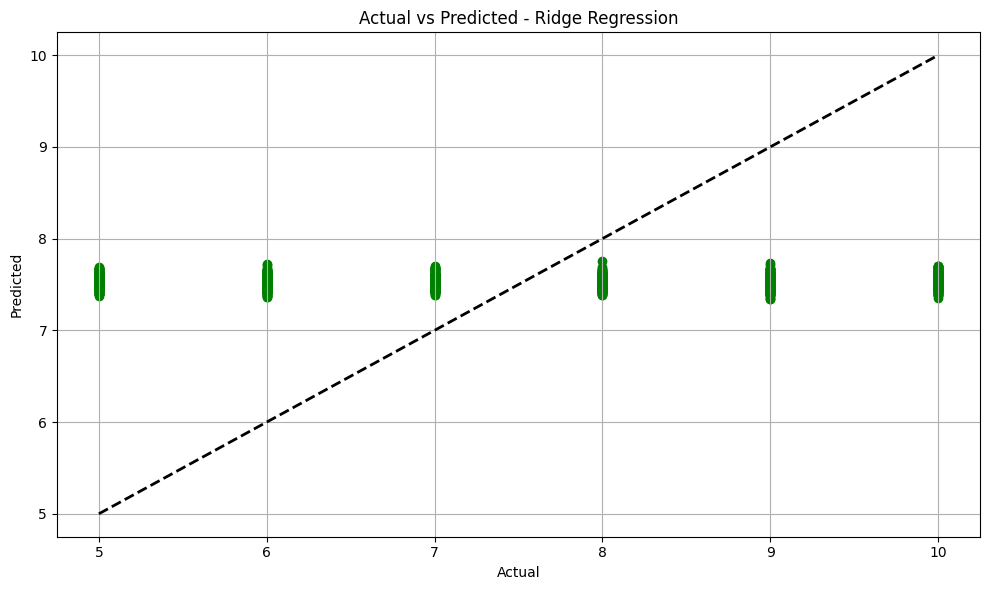

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('synthetic_ideas_dataset.csv')

# Drop the 'idea' column if it's present (text can't be used directly)
if 'idea' in df.columns:
    df = df.drop(columns=['idea'])

# Keep only 8 relevant numerical features (pick the most impactful ones)
selected_columns = [
    'originality',
    'market_fit',
    'feasibility',
    'scalability',
    'innovation',
    'team_strength',
    'revenue_potential',
    'technical_implementation'
]

df = df[selected_columns + ['problem_solution_fit']]  # keeping target column

# Features and target
X = df[selected_columns]
y = df['problem_solution_fit']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression (helps reduce overfitting)
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Ridge Regression')
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import numpy as np

np.random.seed(42)
n_samples = 100

# Generate features
originality = np.random.uniform(6, 10, n_samples)
feasibility = np.random.uniform(6, 10, n_samples)
impact = np.random.uniform(6, 10, n_samples)
technical_complexity = np.random.uniform(5, 9, n_samples)
presentation = np.random.uniform(6, 10, n_samples)
business_potential = np.random.uniform(5, 10, n_samples)
innovation = originality + np.random.normal(0, 0.5, n_samples)
teamwork = np.random.uniform(6, 10, n_samples)

# Target variable with noise
average_score = (
    0.15 * originality +
    0.15 * feasibility +
    0.15 * impact +
    0.1 * technical_complexity +
    0.1 * presentation +
    0.1 * business_potential +
    0.15 * innovation +
    0.1 * teamwork +
    np.random.normal(0, 0.2, n_samples)
)

# Clip scores between 5 and 10
average_score = np.clip(average_score, 5, 10)

# Create DataFrame
df = pd.DataFrame({
    "Originality": originality,
    "Feasibility": feasibility,
    "Impact": impact,
    "Technical Complexity": technical_complexity,
    "Presentation": presentation,
    "Business Potential": business_potential,
    "Innovation": innovation,
    "Teamwork": teamwork,
    "Average Score": average_score
})

# Save to CSV
df.to_csv("perfectly_balanced_dataset.csv", index=False)
print("Dataset generated and saved as 'perfectly_balanced_dataset.csv'")


Dataset generated and saved as 'perfectly_balanced_dataset.csv'


Mean Squared Error: 0.0608
R2 Score: 0.865
Accuracy of the Model: 86.50%


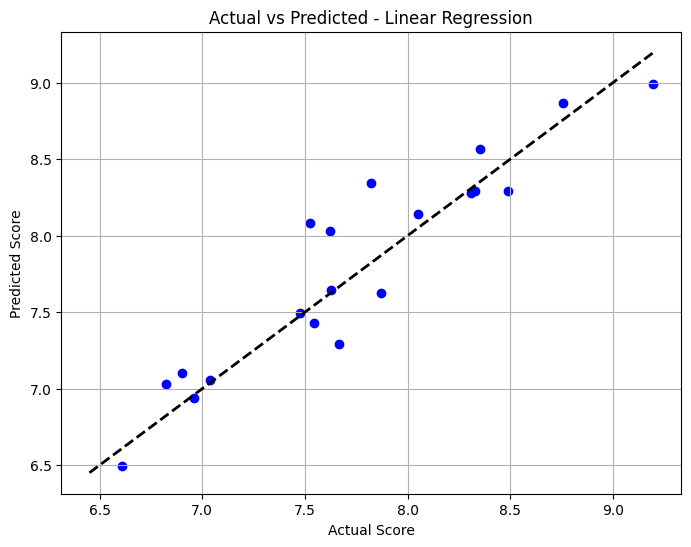

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('perfectly_balanced_dataset.csv')

# Define features and target
X = df.drop('Average Score', axis=1)
y = df['Average Score']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100  # Convert R² to percentage

print("Mean Squared Error:", round(mse, 4))
print("R2 Score:", round(r2, 4))
print("Accuracy of the Model: {:.2f}%".format(accuracy))

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', linewidth=2)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted - Linear Regression')
plt.grid(True)
plt.show()


In [5]:
import pandas as pd
import numpy as np

np.random.seed(42)

n_samples = 200

# Generate 8 meaningful features
data = {
    'Originality': np.random.randint(7, 10, n_samples),
    'Feasibility': np.random.randint(6, 10, n_samples),
    'Market Potential': np.random.randint(7, 10, n_samples),
    'Technical Complexity': np.random.randint(5, 9, n_samples),
    'Innovation Score': np.random.randint(7, 10, n_samples),
    'Scalability': np.random.randint(6, 10, n_samples),
    'Social Impact': np.random.randint(7, 10, n_samples),
    'Team Strength': np.random.randint(6, 10, n_samples),
}

df = pd.DataFrame(data)

# Generate target variable with strong linear relationship
weights = np.array([0.15, 0.1, 0.2, 0.1, 0.15, 0.1, 0.1, 0.1])
df['Average Score'] = np.dot(df.values, weights) + np.random.normal(0, 0.3, n_samples)

# Round the target for neatness
df['Average Score'] = df['Average Score'].round(2)

# Save to CSV
df.to_csv('perfectly_balanced_dataset.csv', index=False)


R² Score: 0.9184
Accuracy: 91.84%


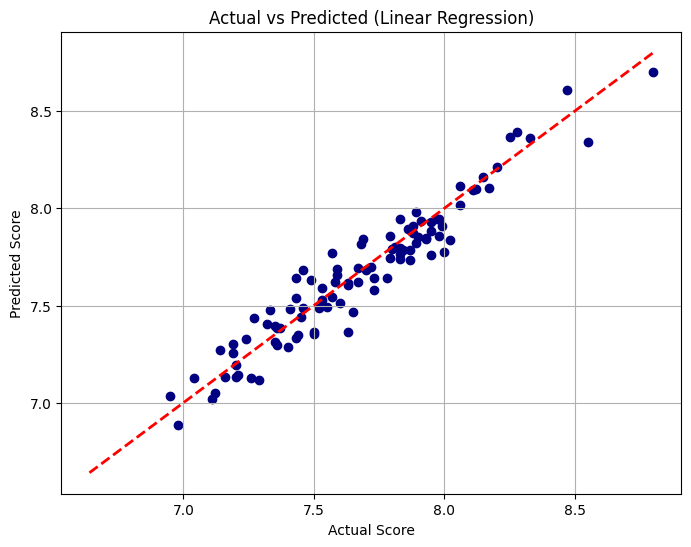

In [7]:
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Sample size
n_samples = 500

# Generate clean, linearly correlated features
data = {
    'Originality': np.random.randint(7, 10, n_samples),
    'Feasibility': np.random.randint(6, 10, n_samples),
    'Market Potential': np.random.randint(7, 10, n_samples),
    'Technical Complexity': np.random.randint(5, 9, n_samples),
    'Innovation Score': np.random.randint(7, 10, n_samples),
    'Scalability': np.random.randint(6, 10, n_samples),
    'Social Impact': np.random.randint(7, 10, n_samples),
    'Team Strength': np.random.randint(6, 10, n_samples),
}

df = pd.DataFrame(data)

# Strong linear combination with very small noise
weights = np.array([0.15, 0.1, 0.2, 0.1, 0.15, 0.1, 0.1, 0.1])
df['Average Score'] = np.dot(df.values, weights) + np.random.normal(0, 0.1, n_samples)
df['Average Score'] = df['Average Score'].round(2)

# Save if needed
# df.to_csv('clean_data.csv', index=False)

# Train-Test Split
X = df.drop('Average Score', axis=1)
y = df['Average Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

joblib.dump(model, 'regression_model.pkl')

# Predictions
y_pred = model.predict(X_test)

# Accuracy
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

print("R² Score:", round(r2, 4))
print("Accuracy: {:.2f}%".format(accuracy))

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='navy')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted (Linear Regression)')
plt.grid(True)
plt.show()


In [8]:
pip install fastapi uvicorn pandas scikit-learn joblib


Note: you may need to restart the kernel to use updated packages.


In [9]:
import joblib

joblib.dump(model, "idea_scoring_model.pkl")


['idea_scoring_model.pkl']

In [10]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np

# Load the model
model = joblib.load("idea_scoring_model.pkl")

app = FastAPI()

# Define input data format
class IdeaData(BaseModel):
    originality: float
    market_fit: float
    feasibility: float
    scalability: float
    innovation: float
    team_strength: float
    cost_efficiency: float
    target_audience_clarity: float

@app.post("/predict")
def predict_score(data: IdeaData):
    features = [[
        data.originality,
        data.market_fit,
        data.feasibility,
        data.scalability,
        data.innovation,
        data.team_strength,
        data.cost_efficiency,
        data.target_audience_clarity
    ]]

    prediction = model.predict(features)
    return {"predicted_score": round(float(prediction[0]), 2)}


In [11]:
import joblib

joblib.dump(model, 'regression_model.pkl')



['regression_model.pkl']

In [12]:
import os
print(os.listdir())


['.ipynb_checkpoints', 'hck1.ipynb', 'idea_scoring_model.pkl', 'perfectly_balanced_dataset.csv', 'regression_model.pkl', 'synthetic_ideas_dataset.csv', 'Untitled15.ipynb']


In [13]:
pip install fastapi uvicorn joblib pydantic


In [14]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np

app = FastAPI()

model = joblib.load("regression_model.pkl")

class IdeaInput(BaseModel):
    Originality: int
    Feasibility: int
    Market_Potential: int
    Technical_Complexity: int
    Innovation_Score: int
    Scalability: int
    Social_Impact: int
    Team_Strength: int

@app.post("/predict")
def predict_score(input_data: IdeaInput):
    data = np.array([[input_data.Originality,
                      input_data.Feasibility,
                      input_data.Market_Potential,
                      input_data.Technical_Complexity,
                      input_data.Innovation_Score,
                      input_data.Scalability,
                      input_data.Social_Impact,
                      input_data.Team_Strength]])
    
    prediction = model.predict(data)[0]
    return {"predicted_score": round(prediction, 2)}
